# Loans Data Exploration

## Preliminary Wrangling

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [216]:
loans = pd.read_csv('prosperLoanData.csv')

In [217]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [218]:
# high-level overview of data shape and composition
print(loans.shape)
print(loans.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

### What is the structure of your dataset?

The dataset contains 113,937 loans with 81 features for each loan. Most columns are numeric; however, we see that ordered the CreditGrade and ProsperRating (Alpha) are represented by categorical variables. 

The CreditGrade order (from worst to best): NC, HR, E, D, C, B, A, AA

The ProsperRating (Alpha) order (from worst to best) : N/A, HR, E, D, C, B, A, AA


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features affect the borrower’s interest rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the Credit Grade, the Prosper Rating, Employment Status, the Debt To Income Ratio, the Income Range and the Stated Monthly Income, will have an effect on the Borrower intereset Rate.

## Univariate Exploration


In [219]:
# remove the unnecessary features from the dataset 

features = ['ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', \
            'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', \
            'ProsperScore', 'EmploymentStatus', 'EmploymentStatusDuration',\
            'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'Investors',]

loans = loans[features]
loans.head()

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,Investors
0,193129,2007-08-26 19:09:29.263000000,C,36,Completed,0.16516,0.1580,NaN,NaN,Self-employed,2.0,True,0.17,"$25,000-49,999",3083.333333,258
1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,0.12016,0.0920,A,7.0,Employed,44.0,False,0.18,"$50,000-74,999",6125.000000,1
2,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,0.28269,0.2750,NaN,NaN,Not available,NaN,False,0.06,Not displayed,2083.333333,41
3,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,0.12528,0.0974,A,9.0,Employed,113.0,True,0.15,"$25,000-49,999",2875.000000,158
4,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,0.24614,0.2085,D,4.0,Employed,44.0,True,0.26,"$100,000+",9583.333333,20


In [220]:
loans['CreditGrade'].unique()


array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [221]:
loans['ProsperRating (Alpha)'].unique()


array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [222]:
loans['ProsperRating (Alpha)'].isna().sum()

29084

In [223]:
loans['CreditGrade'].isna().sum()

84984

In [224]:
loans['CreditGrade'].fillna('NC', inplace =True) 
loans['ProsperRating (Alpha)'].fillna('N/A', inplace =True) 

In [225]:
# Convert CreditGrade and ProsperScore into ordered categorical types
ordinal_var_dict = {'CreditGrade': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperRating (Alpha)': ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

In [226]:
loans['CreditGrade'].unique()

[C, NC, HR, AA, D, B, E, A]
Categories (8, object): [NC < HR < E < D < C < B < A < AA]

In [227]:
loans['ProsperRating (Alpha)'].unique()

[N/A, A, D, B, E, C, AA, HR]
Categories (8, object): [N/A < HR < E < D < C < B < A < AA]

In [228]:
loans['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [229]:
loans['IncomeRange'].isna().sum()

0

In [230]:
range_dict = ['Not displayed','Not employed', '$0', '$1-24,999', '$25,000-49,999', 
                                               '$50,000-74,999', '$75,000-99,999', '$100,000+']

range_cat = pd.api.types.CategoricalDtype(ordered = True, categories = range_dict)
loans['IncomeRange'] = loans['IncomeRange'].astype(range_cat)
loans['IncomeRange'].unique()

[$25,000-49,999, $50,000-74,999, Not displayed, $100,000+, $75,000-99,999, $1-24,999, Not employed, $0]
Categories (8, object): [Not displayed < Not employed < $0 < $1-24,999 < $25,000-49,999 < $50,000-74,999 < $75,000-99,999 < $100,000+]

In [231]:
print(loans['LoanStatus'].unique())
print(loans['EmploymentStatus'].unique())
print(loans['ProsperScore'].unique())

['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']
['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other' nan
 'Not employed' 'Part-time' 'Retired']
[nan  7.  9.  4. 10.  2. 11.  8.  5.  3.  6.  1.]


In [232]:
loans.ListingNumber.duplicated

<bound method Series.duplicated of 0          193129
1         1209647
2           81716
3          658116
4          909464
           ...   
113932     753087
113933     537216
113934    1069178
113935     539056
113936    1140093
Name: ListingNumber, Length: 113937, dtype: int64>

In [233]:
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,ProsperScore,EmploymentStatusDuration,DebtToIncomeRatio,StatedMonthlyIncome,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,84853.000000,106312.000000,105383.000000,1.139370e+05,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,5.950067,96.071582,0.275947,5.608026e+03,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,2.376501,94.480605,0.551759,7.478497e+03,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,1.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,4.000000,26.000000,0.140000,3.200333e+03,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,6.000000,67.000000,0.220000,4.666667e+03,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,8.000000,137.000000,0.320000,6.825000e+03,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,11.000000,755.000000,10.010000,1.750003e+06,1189.000000


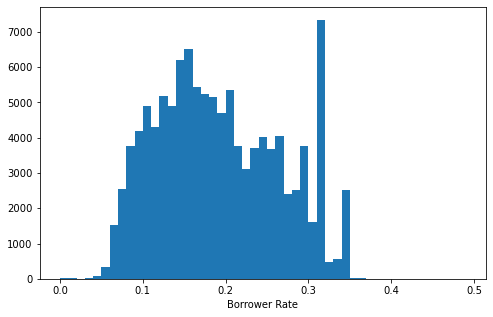

In [234]:
#Bowrrow Rate distribution

binsize = 0.01
rate_bins = np.arange(loans.BorrowerRate.min(), loans.BorrowerRate.max(), binsize)
plt.figure(figsize=[8, 5])
plt.hist(data=loans, x='BorrowerRate', bins=rate_bins)
plt.xlabel('Borrower Rate')
plt.show()

The Borrower rate distribution looks normally distributed, but there is a spike at around 0.3 interest.  

In [235]:
loans.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

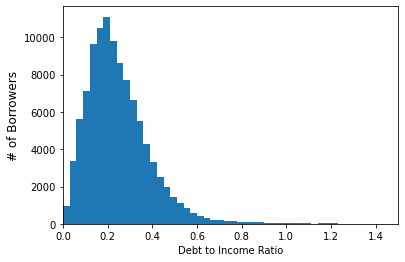

In [236]:
# DebtToIncomeRatio distribution

binsize = 0.03
ratio_bins = np.arange(loans.DebtToIncomeRatio.min(), loans.DebtToIncomeRatio.max()+ binsize, binsize)
plt.hist(data=loans, x='DebtToIncomeRatio', bins=ratio_bins);
plt.xlabel('Debt to Income Ratio')
plt.ylabel('# of Borrowers', size = 12)
plt.xlim(0,1.5)
plt.show()


There's a long tail in the DebtToIncomeRatio distribution

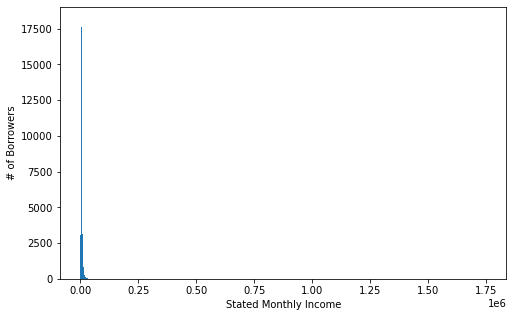

In [237]:
# StatedMonthlyIncome distribution

binsize = 1000
ratio_bins = np.arange(loans.StatedMonthlyIncome.min(), loans.StatedMonthlyIncome.max()+ binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data=loans, x='StatedMonthlyIncome', bins=ratio_bins);
plt.xlabel('Stated Monthly Income')
plt.ylabel('# of Borrowers')
plt.show()


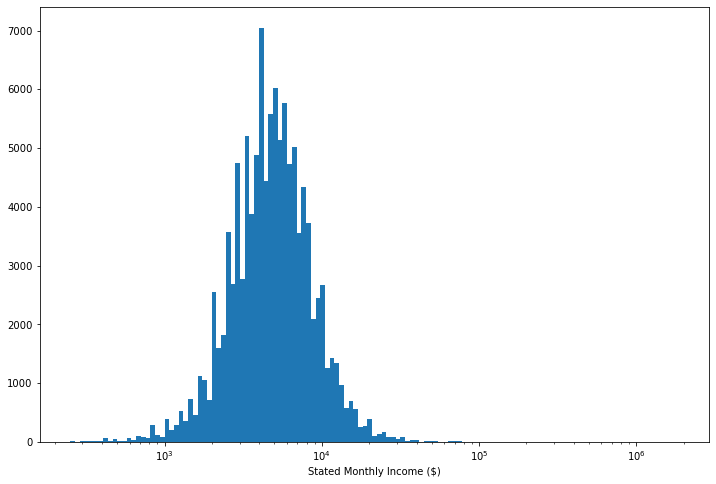

In [238]:
# the stated monthy income on the log scale 
log_binsize = 0.03
ratio_bins = 10 ** np.arange(2.4, np.log10(loans.StatedMonthlyIncome.max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = loans, x='StatedMonthlyIncome', bins=ratio_bins)
plt.xscale('log')
plt.xlabel('Stated Monthly Income ($)')
plt.show()

In [239]:
loans.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [240]:
loans.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [241]:
loans['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [242]:
# lets Define EmploymentStatus as a category
employment_dict = ['Not available', 'Other', 'Not employed', 'Self-employed', 
                                               'Part-time', 'Full-time', 'Employed', 'Retired']

employment_cat = pd.api.types.CategoricalDtype(ordered = True, categories = employment_dict)
loans['EmploymentStatus'] = loans['EmploymentStatus'].astype(employment_cat)

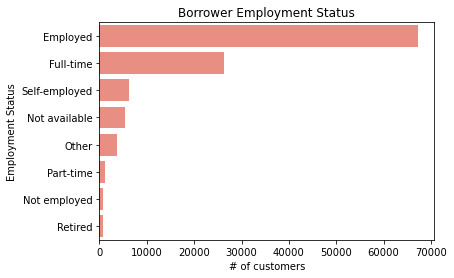

In [243]:
sb.countplot(data = loans, y = 'EmploymentStatus', color = 'salmon', order = loans['EmploymentStatus'].value_counts().index)
plt.title('Borrower Employment Status')
plt.xlabel('# of customers')
plt.ylabel('Employment Status')
plt.show()

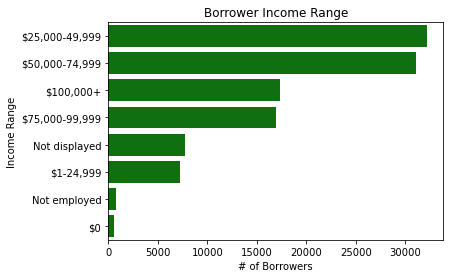

In [244]:
sb.countplot(data = loans, y = 'IncomeRange', color = 'green', order = loans['IncomeRange'].value_counts().index)
plt.title('Borrower Income Range')
plt.xlabel('# of Borrowers')
plt.ylabel('Income Range')
plt.show()

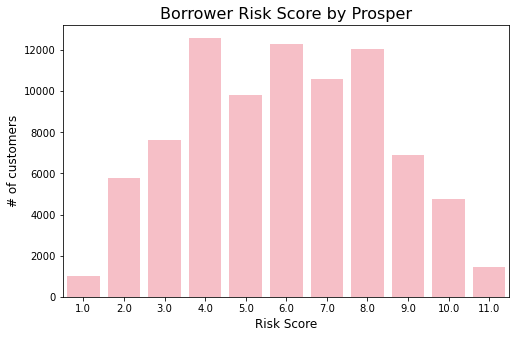

In [245]:
binsize = 1
bins = np.arange(loans['ProsperScore'].min(), loans['ProsperScore'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
sb.countplot(data = loans, x = 'ProsperScore', color = 'lightpink')
plt.title('Borrower Risk Score by Prosper', size = 16)
plt.xlabel('Risk Score', size = 12)
plt.ylabel('# of customers', size = 12)
plt.show()

Prosper Score (Risk Score) looks like it's normally distributed

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
distributions performed are mostly normally distributed. However, The Borrower rate distribution looks normally has a spike at around 0.3 interest.  


## Bivariate Exploration

I will look at the pairwise correlations present between features in the data.

In [246]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ListingNumber             113937 non-null  int64   
 1   ListingCreationDate       113937 non-null  object  
 2   CreditGrade               113937 non-null  category
 3   Term                      113937 non-null  int64   
 4   LoanStatus                113937 non-null  object  
 5   BorrowerAPR               113912 non-null  float64 
 6   BorrowerRate              113937 non-null  float64 
 7   ProsperRating (Alpha)     113937 non-null  category
 8   ProsperScore              84853 non-null   float64 
 9   EmploymentStatus          111682 non-null  category
 10  EmploymentStatusDuration  106312 non-null  float64 
 11  IsBorrowerHomeowner       113937 non-null  bool    
 12  DebtToIncomeRatio         105383 non-null  float64 
 13  IncomeRange               113

In [247]:
loans.columns.values

array(['ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term',
       'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating (Alpha)', 'ProsperScore', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome',
       'Investors'], dtype=object)

In [248]:
numeric_vars = ['BorrowerAPR', 'BorrowerRate','Term', 'EmploymentStatusDuration','ProsperScore', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Investors']
categoric_vars = ['CreditGrade', 'ProsperRating (Alpha)','LoanStatus', 'EmploymentStatus','IncomeRange', 'IsBorrowerHomeowner']
                  

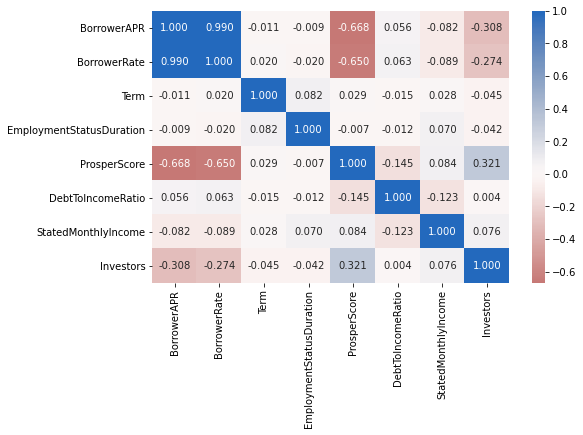

In [249]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

There is a strong correlation between the Borrower APR and the Borrower Rate which is expected. Also, there a slight anti-correlation between the number of investors and the the Borrower APR.


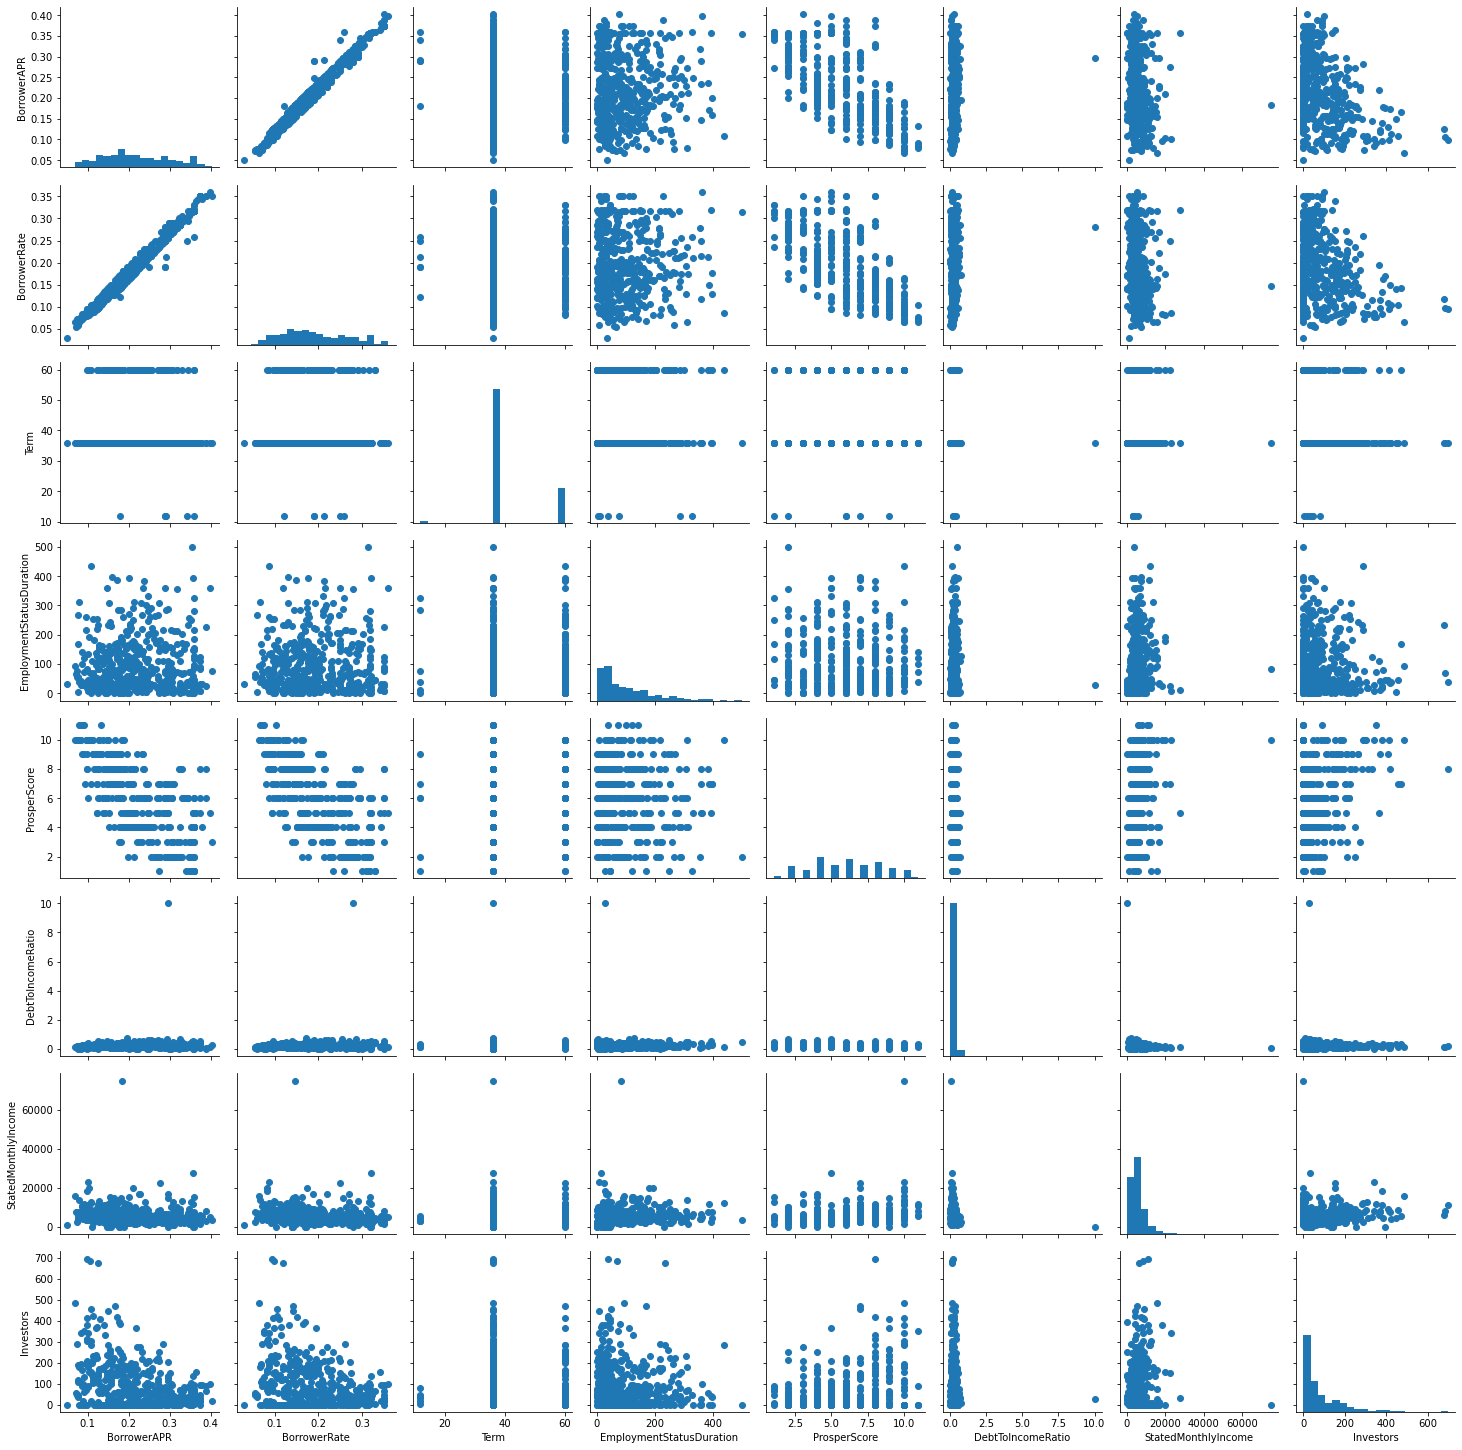

In [250]:
samples = np.random.choice(loans.shape[0], 500, replace = False)
loans_samp = loans.loc[samples,:]

g = sb.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

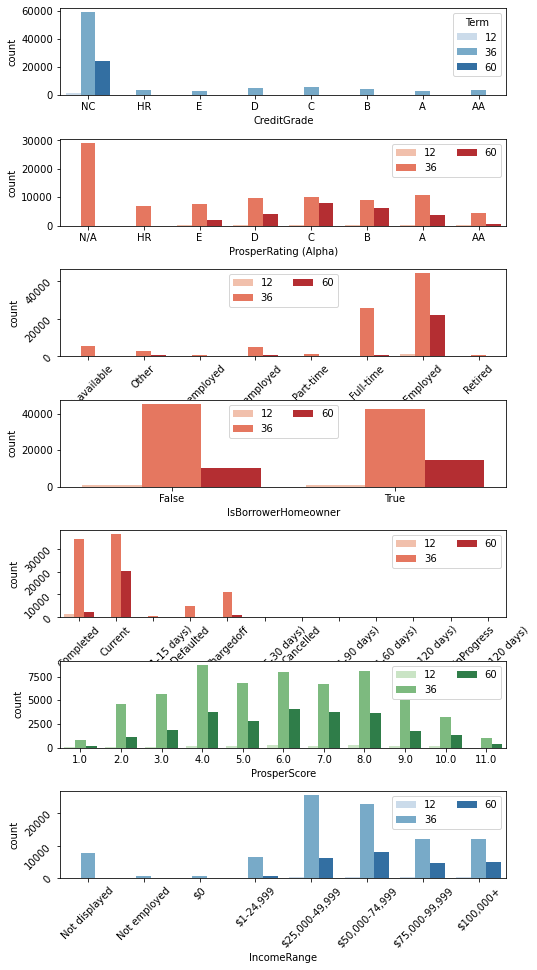

In [251]:
fig = plt.figure(figsize = [8, 16])
fig.subplots_adjust(hspace=.5)
# subplot 1: CreditGrade vs ProsperScore
plt.subplot(7, 1, 1)
sb.countplot(data = loans, x = 'CreditGrade', hue = 'Term', palette = 'Blues')

# subplot 2: ProsperRating (Alpha) vs. ProsperScore
ax = plt.subplot(7, 1, 2)
sb.countplot(data = loans, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: ProsperRating (Alpha) vs. ProsperScore
ax = plt.subplot(7, 1, 3)
sb.countplot(data = loans, x = 'EmploymentStatus', hue = 'Term', palette = 'Reds')
ax.tick_params(labelrotation=45)
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping


# subplot 4: ProsperRating (Alpha) vs. ProsperScore
ax = plt.subplot(7, 1, 4)
sb.countplot(data = loans, x = 'IsBorrowerHomeowner', hue = 'Term', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 5: ProsperRating (Alpha) vs. ProsperScore
ax = plt.subplot(7, 1, 5)
sb.countplot(data = loans, x = 'LoanStatus', hue = 'Term', palette = 'Reds')
ax.tick_params(labelrotation=45)
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 6: EmploymentStatus vs. ProsperScore
ax = plt.subplot(7, 1, 6)
sb.countplot(data = loans, x = 'ProsperScore', hue = 'Term', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 7: EmploymentStatus vs. ProsperScore
ax = plt.subplot(7, 1, 7)
sb.countplot(data = loans, x = 'IncomeRange', hue = 'Term', palette = 'Blues')
ax.tick_params(labelrotation=45)
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is a strong correlation between the Borrower APR and the Borrower Rate which is expected. Also, there a slight anti-correlation between the number of investors and the the Borrower APR.



## Multivariate Exploration


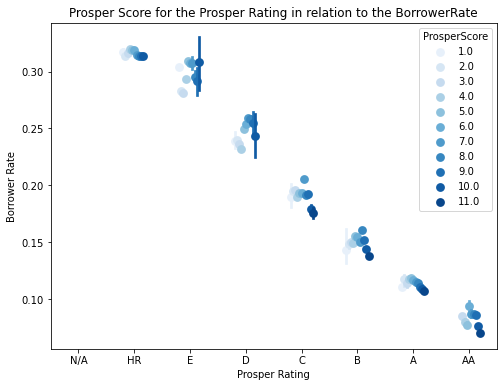

In [252]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x='ProsperRating (Alpha)', y='BorrowerRate', hue='ProsperScore',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Prosper Score for the Prosper Rating in relation to the BorrowerRate')
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower Rate')

plt.show();

It seems like the Prosper Rating is strongly correlated to the Borrower rate, meanwhile, we see that ProsperScore is distributed across all the Prosper Rating categories and so it's correlation to the Borrower Rate is deacreased, which wasn't very clear why this was the case in the Bivariate exploration. 

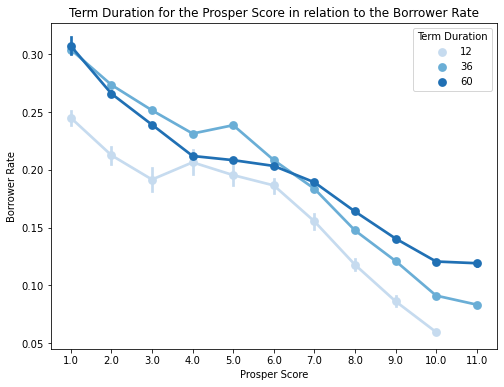

In [253]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x='ProsperScore', y='BorrowerRate', hue='Term',
           palette = 'Blues', linestyles = '-')
plt.title('Term Duration for the Prosper Score in relation to the Borrower Rate')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower Rate')
plt.legend(loc=1, title = 'Term Duration')
plt.show();

It seems like shorter term durations in combination with higher prosper score results in decreated borrower rate.

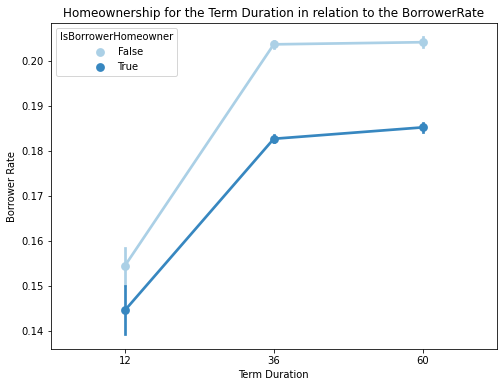

In [254]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x='Term', y='BorrowerRate', hue='IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '-')
plt.title('Homeownership for the Term Duration in relation to the BorrowerRate')
plt.xlabel('Term Duration')
plt.ylabel('Borrower Rate')

plt.show();

It seems like shorter term durations in combination with true home ownership results in decreased borrower rate.

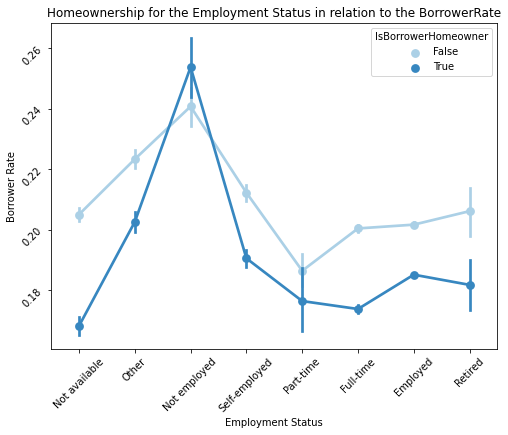

In [255]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x='EmploymentStatus', y='BorrowerRate', hue='IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '-')
plt.title('Homeownership for the Employment Status in relation to the BorrowerRate')
plt.xlabel('Employment Status')
ax.tick_params(labelrotation=45)
plt.ylabel('Borrower Rate')

plt.show();

From this plot, we can see that the lowest borrrower rate is for a borrower with full-time employment and a home owner, opposite to an non-employed person with no home ownership, wich is expected. 

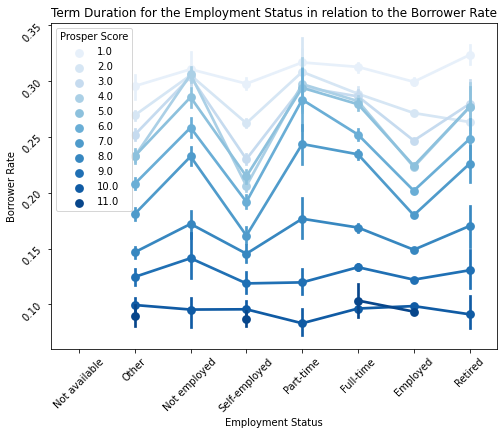

In [256]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x='EmploymentStatus', y='BorrowerRate', hue='ProsperScore',
           palette = 'Blues', linestyles = '-')
plt.title('Term Duration for the Employment Status in relation to the Borrower Rate')
plt.xlabel('Employment Status')
plt.ylabel('Borrower Rate')
ax.tick_params(labelrotation=45)
plt.legend(loc=2, title = 'Prosper Score')
plt.show();

it seems like employment status doesn't make much difference if it's accompanied with high prosper score. However, the lower the prosper score gets,  emplyment status is then taken into consideration for deciding on the borrower rate. 

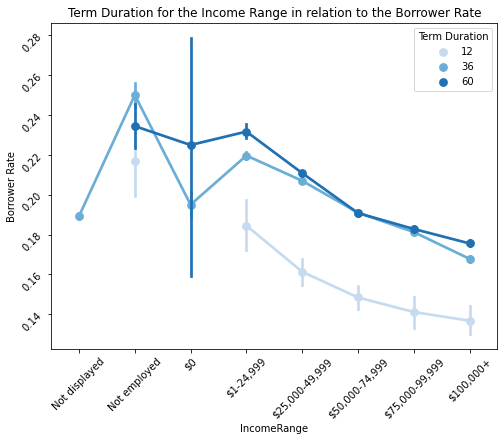

In [257]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x='IncomeRange', y='BorrowerRate', hue='Term',
           palette = 'Blues', linestyles = '-')
plt.title('Term Duration for the Income Range in relation to the Borrower Rate')
plt.xlabel('IncomeRange')
plt.ylabel('Borrower Rate')
ax.tick_params(labelrotation=45)
plt.legend(loc=1, title = 'Term Duration')
plt.show();

Higher income range with shorter term durations has lower borrower rates. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The relationship between term durations and prosper score has high anti-correlation with the borrower rate. Same with the relationship between term durations and the income range, also Employment Status accompanied with Home ownership has an effect on the borrower rate. 

